In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [2]:
df_train = pd.read_csv('../input/train.csv', parse_dates=["activation_date"])
df_test = pd.read_csv('../input/test.csv', parse_dates=["activation_date"])
df_test_sub = pd.read_csv('../proto/result_tmp/submit_02244.csv')
df_test = pd.merge(df_test, df_test_sub, how='left', on='item_id')
del df_test_sub

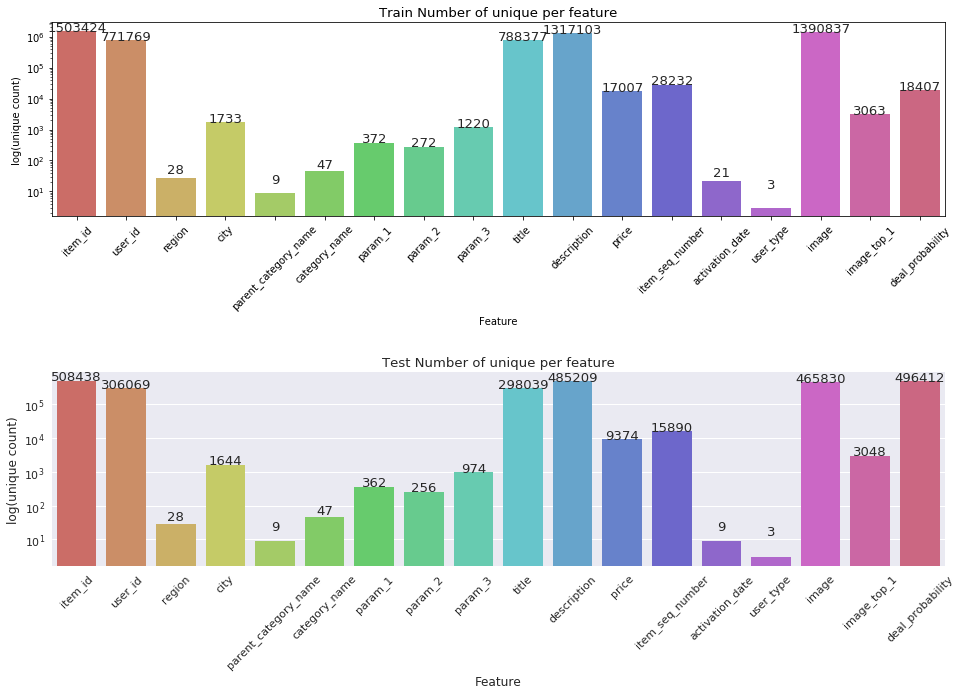

In [3]:
plt.figure(figsize=(16, 10))                   # 描画サイズ
plt.subplots_adjust(wspace=0.2, hspace=0.8)    # サブプロット間の余白

# サブプロット1を定義
plt.subplot(2,1,1)
sns.set(font_scale=1.1)              # フォントサイズ
cols = df_train.columns              # データのカラム取得
uniques = [len(df_train[col].unique()) for col in cols]   # データのユニークカウント取得
ax = sns.barplot(cols, uniques, palette='hls', log=True)  # 棒ブラフを作成する
ax.set(xlabel='Feature', ylabel='log(unique count)', title='Train Number of unique per feature')
for p, uniq in zip(ax.patches, uniques):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 10,
            uniq,
            ha="center") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

# サブプロット2を定義
plt.subplot(2,1,2)
sns.set(font_scale=1.1)               # フォントサイズ
cols = df_test.columns                # データのカラム取得
uniques = [len(df_test[col].unique()) for col in cols]   # データのユニークカウント取得
ax = sns.barplot(cols, uniques, palette='hls', log=True)
ax.set(xlabel='Feature', ylabel='log(unique count)', title='Test Number of unique per feature')
for p, uniq in zip(ax.patches, uniques):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 10,
            uniq,
            ha="center") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

plt.show()

/home/manage/python/kaggle/lib64/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


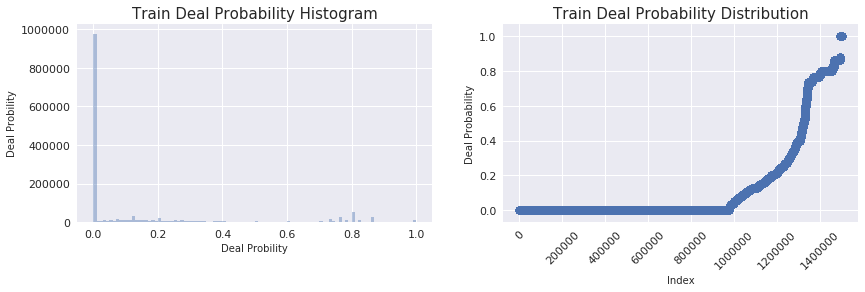

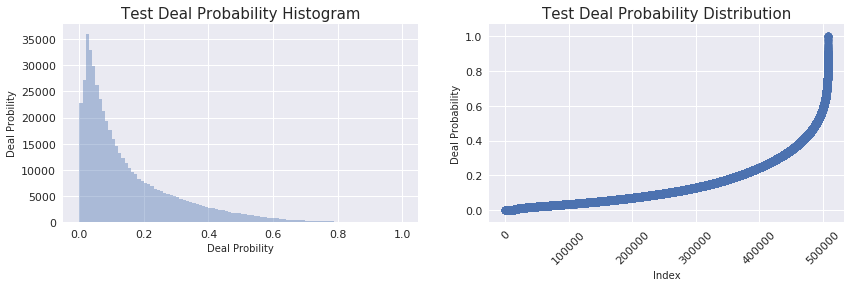

In [4]:
# フィギュア1
plt.figure(figsize=(14,8))

plt.subplot(2,2,1)
ax = sns.distplot(df_train["deal_probability"].values, bins=100, kde=False)
ax.set_xlabel('Deal Probility', fontsize=10)
ax.set_ylabel('Deal Probility', fontsize=10)
ax.set_title("Train Deal Probability Histogram", fontsize=15)

plt.subplot(2,2,2)
plt.scatter(range(df_train.shape[0]), np.sort(df_train['deal_probability'].values))
plt.xlabel('Index', fontsize=10)
plt.ylabel('Deal Probability', fontsize=10)
plt.title("Train Deal Probability Distribution", fontsize=15)
plt.xticks(rotation=45)

# フィギュア2
plt.figure(figsize=(14,8))

plt.subplot(2,2,1)
ax = sns.distplot(df_test["deal_probability"].values, bins=100, kde=False)
ax.set_xlabel('Deal Probility', fontsize=10)
ax.set_ylabel('Deal Probility', fontsize=10)
ax.set_title("Test Deal Probability Histogram", fontsize=15)

plt.subplot(2,2,2)
plt.scatter(range(df_test.shape[0]), np.sort(df_test['deal_probability'].values))
plt.xlabel('Index', fontsize=10)
plt.ylabel('Deal Probability', fontsize=10)
plt.title("Test Deal Probability Distribution", fontsize=15)
plt.xticks(rotation=45)

plt.show()

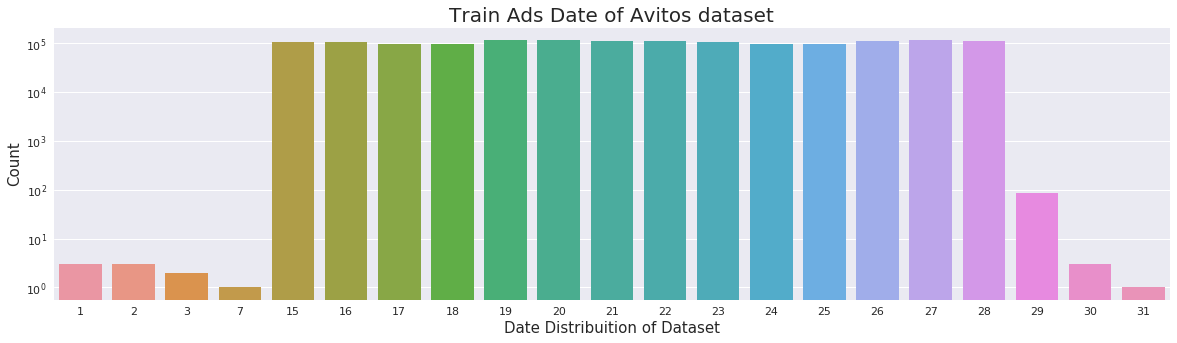

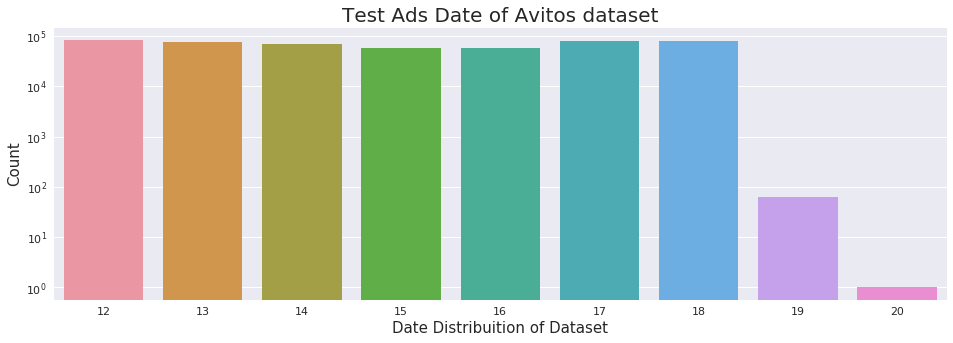

In [5]:
df_train['day'] = df_train['activation_date'].dt.day
df_test['day'] = df_test['activation_date'].dt.day

time_count1 = df_train['day'].value_counts()
time_count2 = df_test['day'].value_counts()

# Train
plt.figure(figsize=(20,5))
g = sns.barplot(time_count1.index, time_count1.values, log=True)
g.set_xlabel("Date Distribuition of Dataset", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_title("Train Ads Date of Avitos dataset", fontsize=20)

# Test
plt.figure(figsize=(16,5))
g = sns.barplot(time_count2.index, time_count2.values, log=True)
g.set_xlabel("Date Distribuition of Dataset", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_title("Test Ads Date of Avitos dataset", fontsize=20)

plt.show()

## activation_date と price の比較
Trainデータは、100万超えがある。
Testデータは、30万前後

In [6]:
df_train_date = pd.read_csv('../input/train.csv').set_index('activation_date')
df_test_date = pd.read_csv('../input/test.csv')
df_test_date = pd.merge(df_test_date, df_test_sub, how='left', on='item_id')
df_test_date = df_test_date.set_index('activation_date')

df_train_date.index = pd.to_datetime(df_train_date.index)
df_test_date.index = pd.to_datetime(df_test_date.index)

# Dayでリサンプリング この為だけで activation_date を索引においた
df_train_price = df_train_date["price"].resample("D").apply([np.mean])
df_test_price = df_test_date["price"].resample("D").apply([np.mean])

# Seaborn に渡す為、activation_date をvalueに戻す
df_train_price = df_train_price.reset_index(drop=False)
df_test_price = df_test_price.reset_index(drop=False)

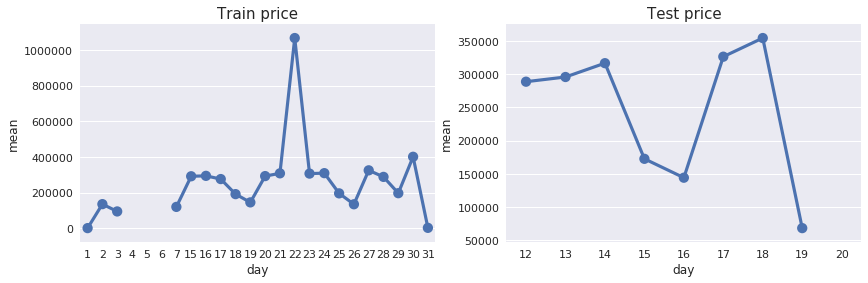

In [7]:
df_train_price['day'] = df_train_price['activation_date'].dt.day
df_test_price['day'] = df_test_price['activation_date'].dt.day

plt.figure(figsize=(14,4))

plt.subplot(1,2,1)
g = sns.pointplot(x='day', y='mean', data=df_train_price)
g.set_title("Train price", fontsize=15)

plt.subplot(1,2,2)
g = sns.pointplot(x='day', y='mean', data=df_test_price)
g.set_title("Test price", fontsize=15)

plt.show()

In [45]:
date_list_train = ['2017-03-15', '2017-03-16', '2017-03-17', '2017-03-18', '2017-03-19',
                   '2017-03-20', '2017-03-21', '2017-03-22', '2017-03-23', '2017-03-24',
                   '2017-03-25', '2017-03-26', '2017-03-27']
                # 2017-03-28', '2017-03-29', '2017-03-30', '2017-03-31', '2017-04-01']
for i in date_list_train:
    print(df_train_date.loc[i,['price', 'item_id']].sort_values(by='price', ascending=False).head(5))

                       price       item_id
activation_date                           
2017-03-15       589540000.0  252fe752daaf
2017-03-15       380000000.0  188a6e77e413
2017-03-15       350400000.0  bb94086f5d89
2017-03-15       260000000.0  7ff881eda38c
2017-03-15       228000000.0  9df5bfb3530f
                        price       item_id
activation_date                            
2017-03-16       2.000025e+09  f38907808106
2017-03-16       6.524000e+08  8010077f857d
2017-03-16       3.692433e+08  890402dadc07
2017-03-16       2.270000e+08  d1221564ba27
2017-03-16       1.800000e+08  0f9d4fa3c9df
                       price       item_id
activation_date                           
2017-03-17       200350300.0  e98361059ebc
2017-03-17       200300300.0  e00c84914f4f
2017-03-17       200000000.0  29c1db543b82
2017-03-17       160000000.0  360d2fd72e6b
2017-03-17       157847000.0  c67f010cc8a1
                        price       item_id
activation_date                            
20

In [46]:
date_list_test = ['2017-04-12', '2017-04-13', '2017-04-14', '2017-04-15', '2017-04-16',
                  '2017-04-17', '2017-04-18']
                 # '2017-04-19', '2017-04-20']
for i in date_list_test:
    print(df_test_date.loc[i,['price']].sort_values(by='price', ascending=False).head(5))

                       price
activation_date             
2017-04-12       250000000.0
2017-04-12       242260956.0
2017-04-12       200120150.0
2017-04-12       180000000.0
2017-04-12       163980000.0
                       price
activation_date             
2017-04-13       360000000.0
2017-04-13       190000000.0
2017-04-13       180000000.0
2017-04-13       160000000.0
2017-04-13       150010000.0
                       price
activation_date             
2017-04-14       851045976.0
2017-04-14       150000000.0
2017-04-14       120000000.0
2017-04-14       111111111.0
2017-04-14       110000000.0
                       price
activation_date             
2017-04-15       280000000.0
2017-04-15       100000000.0
2017-04-15       100000000.0
2017-04-15        99000000.0
2017-04-15        80000000.0
                       price
activation_date             
2017-04-16       220000000.0
2017-04-16       200300500.0
2017-04-16       174900000.0
2017-04-16        79900000.0
2017-04-16    

In [116]:
# del df_train_price, df_test_price
# del df_train_date, df_test_date, df_train_price, df_test_price

## activation_date と deal の比較

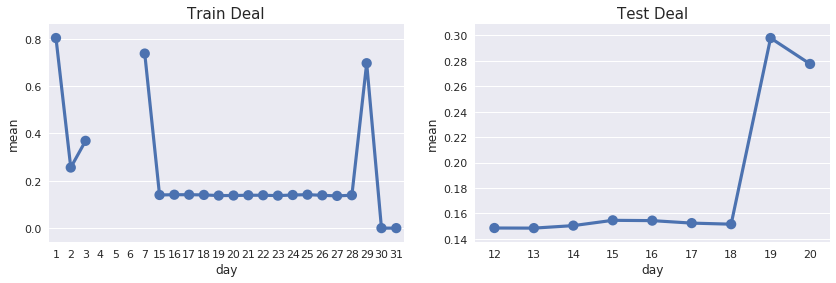

In [43]:
# Dayでリサンプリング この為だけで activation_date を索引においた
df_train_deal = df_train_date["deal_probability"].resample("D").apply([np.mean])
df_test_deal = df_test_date["deal_probability"].resample("D").apply([np.mean])

# Seaborn に渡す為、activation_date をvalueに戻す
df_train_deal = df_train_deal.reset_index(drop=False)
df_test_deal = df_test_deal.reset_index(drop=False)

df_train_deal['day'] = df_train_deal['activation_date'].dt.day
df_test_deal['day'] = df_test_deal['activation_date'].dt.day

plt.figure(figsize=(14,4))

plt.subplot(1,2,1)
g = sns.pointplot(x='day', y='mean', data=df_train_deal)
g.set_title("Train Deal", fontsize=15)

plt.subplot(1,2,2)
g = sns.pointplot(x='day', y='mean', data=df_test_deal)
g.set_title("Test Deal", fontsize=15)

plt.show()

In [41]:
for i in date_list_train:
    print(df_train_date.loc[i,['deal_probability', 'item_id']].sort_values(by='deal_probability', ascending=False).head(5))

                 deal_probability       item_id
activation_date                                
2017-03-15                    1.0  d30acc570915
2017-03-15                    1.0  9da7c330453c
2017-03-15                    1.0  add0ee401f56
2017-03-15                    1.0  56400ad92474
2017-03-15                    1.0  fae20bcf28fc
                 deal_probability       item_id
activation_date                                
2017-03-16                    1.0  cc2edd53bf31
2017-03-16                    1.0  6614ced1f752
2017-03-16                    1.0  c07f9d92ab1d
2017-03-16                    1.0  34bbc408bc80
2017-03-16                    1.0  a1dd7a763367
                 deal_probability       item_id
activation_date                                
2017-03-17                    1.0  c585035a41d2
2017-03-17                    1.0  7f3fc3930b14
2017-03-17                    1.0  2b24a12bc307
2017-03-17                    1.0  b2d71c8158dd
2017-03-17                    1.0  941d0

In [42]:
for i in date_list_test:
    print(df_test_date.loc[i,['deal_probability', 'item_id']].sort_values(by='deal_probability', ascending=False).head(5))

                 deal_probability       item_id
activation_date                                
2017-04-12                    1.0  eec3f622a9b8
2017-04-12                    1.0  796265aa37c9
2017-04-12                    1.0  1257139d1ff5
2017-04-12                    1.0  0c61cc6cd962
2017-04-12                    1.0  c9a3b67dcf22
                 deal_probability       item_id
activation_date                                
2017-04-13                    1.0  25135442ca6e
2017-04-13                    1.0  78c951653f5c
2017-04-13                    1.0  128570c426fb
2017-04-13                    1.0  be3307b709e0
2017-04-13                    1.0  14b9525aaaed
                 deal_probability       item_id
activation_date                                
2017-04-14               1.000000  34236bb3c7d1
2017-04-14               1.000000  f4cd64f62e1e
2017-04-14               1.000000  49620b8e62f2
2017-04-14               0.993093  89be9139faae
2017-04-14               0.979617  11783

In [113]:
# del df_train_deal, df_test_deal

## split 検証
・activation_date でソートしたところ、testデータは「03-15,03-16」に絞られた  
・この結果から、train_test_split() は先頭から順番に分割している仕様

In [56]:
df_train = pd.read_csv('../input/train.csv', index_col=['item_id'], parse_dates=["activation_date"])
df_test = pd.read_csv('../input/test.csv', index_col=['item_id'], parse_dates=["activation_date"])

# train_y = df_train['deal_probability']
# train_X = df_train.drop(["deal_probability"], axis=1)

In [57]:
list_train = ['2017-03-16', '2017-03-17', '2017-03-18', '2017-03-19',
              '2017-03-20', '2017-03-21', '2017-03-22']
list_valid = ['2017-03-24', '2017-03-25', '2017-03-26', '2017-03-27',
              '2017-03-28', '2017-03-29', '2017-03-30', '2017-03-31']
train_X_00 = df_train[df_train['activation_date'] == pd.to_datetime('2017-03-15')]
valid_X_00 = df_train[df_train['activation_date'] == pd.to_datetime('2017-03-23')]
for i in tqdm(list_train):
    train_X_01 = df_train[df_train['activation_date'] == pd.to_datetime(i)]
    train_X_00 = pd.concat([train_X_00, train_X_01])
for i in tqdm(list_valid):
    valid_X_01 = df_train[df_train['activation_date'] == pd.to_datetime(i)]
    valid_X_00 = pd.concat([valid_X_00, valid_X_01])

100%|██████████| 8/8 [00:06<00:00,  1.32it/s]


In [58]:
# Train Data Split
train_X, feat_X1, = train_test_split(train_X_00, 
                                    test_size=0.50, shuffle=True, random_state=23)
valid_X, feat_X2, = train_test_split(valid_X_00, 
                                        test_size=0.75, shuffle=True, random_state=23)

print(train_X.shape)
print(feat_X1.shape)
print(valid_X.shape)
print(feat_X2.shape)

# Train Data Split
# train_X, valid_X, train_y, valid_y = train_test_split(train_X, train_y, 
#                                                       test_size=0.10, shuffle=False, random_state=23)

(430532, 17)
(430532, 17)
(160587, 17)
(481764, 17)


In [59]:
list_drops = ['2017-03-15', '2017-03-16', '2017-03-17', '2017-03-18', '2017-03-19',
              '2017-03-20', '2017-03-21', '2017-03-22', '2017-03-23', '2017-03-24',
              '2017-03-25', '2017-03-26', '2017-03-27', '2017-03-28', '2017-03-29', '2017-03-30', '2017-03-31']
for i in tqdm(list_drops):
    df_train.drop(df_train.index[df_train['activation_date'] == pd.to_datetime(i)], inplace=True)

df_feature = pd.concat([df_train, feat_X1, feat_X2])

print(train_X.shape)
print(valid_X.shape)
print(df_feature.shape)
print()
print(train_X['activation_date'].value_counts())
print(valid_X['activation_date'].value_counts())
print(df_feature['activation_date'].value_counts())

del df_train, feat_X1, feat_X2

100%|██████████| 17/17 [00:11<00:00,  1.53it/s]


(430532, 17)
(160587, 17)
(912305, 17)

2017-03-19    57318
2017-03-20    57301
2017-03-21    55232
2017-03-22    55043
2017-03-15    54138
2017-03-16    53241
2017-03-17    49346
2017-03-18    48913
Name: activation_date, dtype: int64
2017-03-27    28951
2017-03-28    28296
2017-03-26    28127
2017-03-23    26560
2017-03-24    24316
2017-03-25    24315
2017-03-29       22
Name: activation_date, dtype: int64
2017-03-27    85912
2017-03-26    85386
2017-03-28    84589
2017-03-23    79984
2017-03-24    73035
2017-03-25    72789
2017-03-20    57889
2017-03-19    57098
2017-03-21    55303
2017-03-22    54770
2017-03-15    54477
2017-03-16    52927
2017-03-17    49427
2017-03-18    48641
2017-03-29       65
2017-04-02        3
2017-03-30        3
2017-04-01        3
2017-04-03        2
2017-04-07        1
2017-03-31        1
Name: activation_date, dtype: int64


In [35]:
print(train_X.nunique())
print()
print(valid_X.nunique())

user_id                 134237
region                      28
city                      1371
parent_category_name         9
category_name               47
param_1                    347
param_2                    235
param_3                    734
title                   112955
description             154129
price                     4641
item_seq_number           7601
activation_date              8
user_type                    3
image                   159166
image_top_1               2986
deal_probability          7356
dtype: int64

user_id                 101111
region                      28
city                      1298
parent_category_name         9
category_name               47
param_1                    341
param_2                    235
param_3                    687
title                    87233
description             114700
price                     3947
item_seq_number           6139
activation_date              7
user_type                    3
image                   1

In [36]:
print(train_X['activation_date'].value_counts())
print()
print(valid_X['activation_date'].value_counts())

2017-03-19    23134
2017-03-20    22824
2017-03-21    22097
2017-03-22    22073
2017-03-15    21721
2017-03-16    21293
2017-03-17    19652
2017-03-18    19418
Name: activation_date, dtype: int64

2017-03-27    23148
2017-03-28    22552
2017-03-26    22534
2017-03-23    21257
2017-03-24    19513
2017-03-25    19448
2017-03-29       18
Name: activation_date, dtype: int64
